In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow as tf
from object_detection.utils import visualization_utils
from PIL import Image
from det_and_class_utils import *

%matplotlib inline
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "y",
          "axes.facecolor" : "None",
          "text.color" : 'w'}
plt.rcParams.update(params)


In [24]:
detector = hub.load("https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1")


In [33]:
FILE_NUMBER = "70"
original_image = Image.open('data/samples/IMG_' + FILE_NUMBER + '.jpg')
original_image = original_image.resize((1040,585))
original_image = np.asarray(original_image)


In [34]:
im = original_image[np.newaxis, :]
detector_output = detector(im)


In [35]:
boxes = np.squeeze(detector_output["detection_boxes"])
classes = detector_output["detection_classes"]
scores = detector_output["detection_scores"]


In [36]:
# from existing file
boxes = np.genfromtxt(fname=f'data/samples/BOX_{FILE_NUMBER}.csv', delimiter=',')
# filter boxes manually to create samples
# boxes = adjust_boxes_manual_selection(boxes,
#                                       MEAN_H = 0.09,
#                                       MEAN_W = 0.13,
#                                       ROUND_FACTOR_100 = 85,
#                                       MARGIN_H_D = 0.4,
#                                       MARGIN_H_U = 0.8,
#                                       MARGIN_W_D = 0.4,
#                                       MARGIN_W_U = 0.8,
#                                       ROUND_FACTOR_1000 = 3
#                                       )


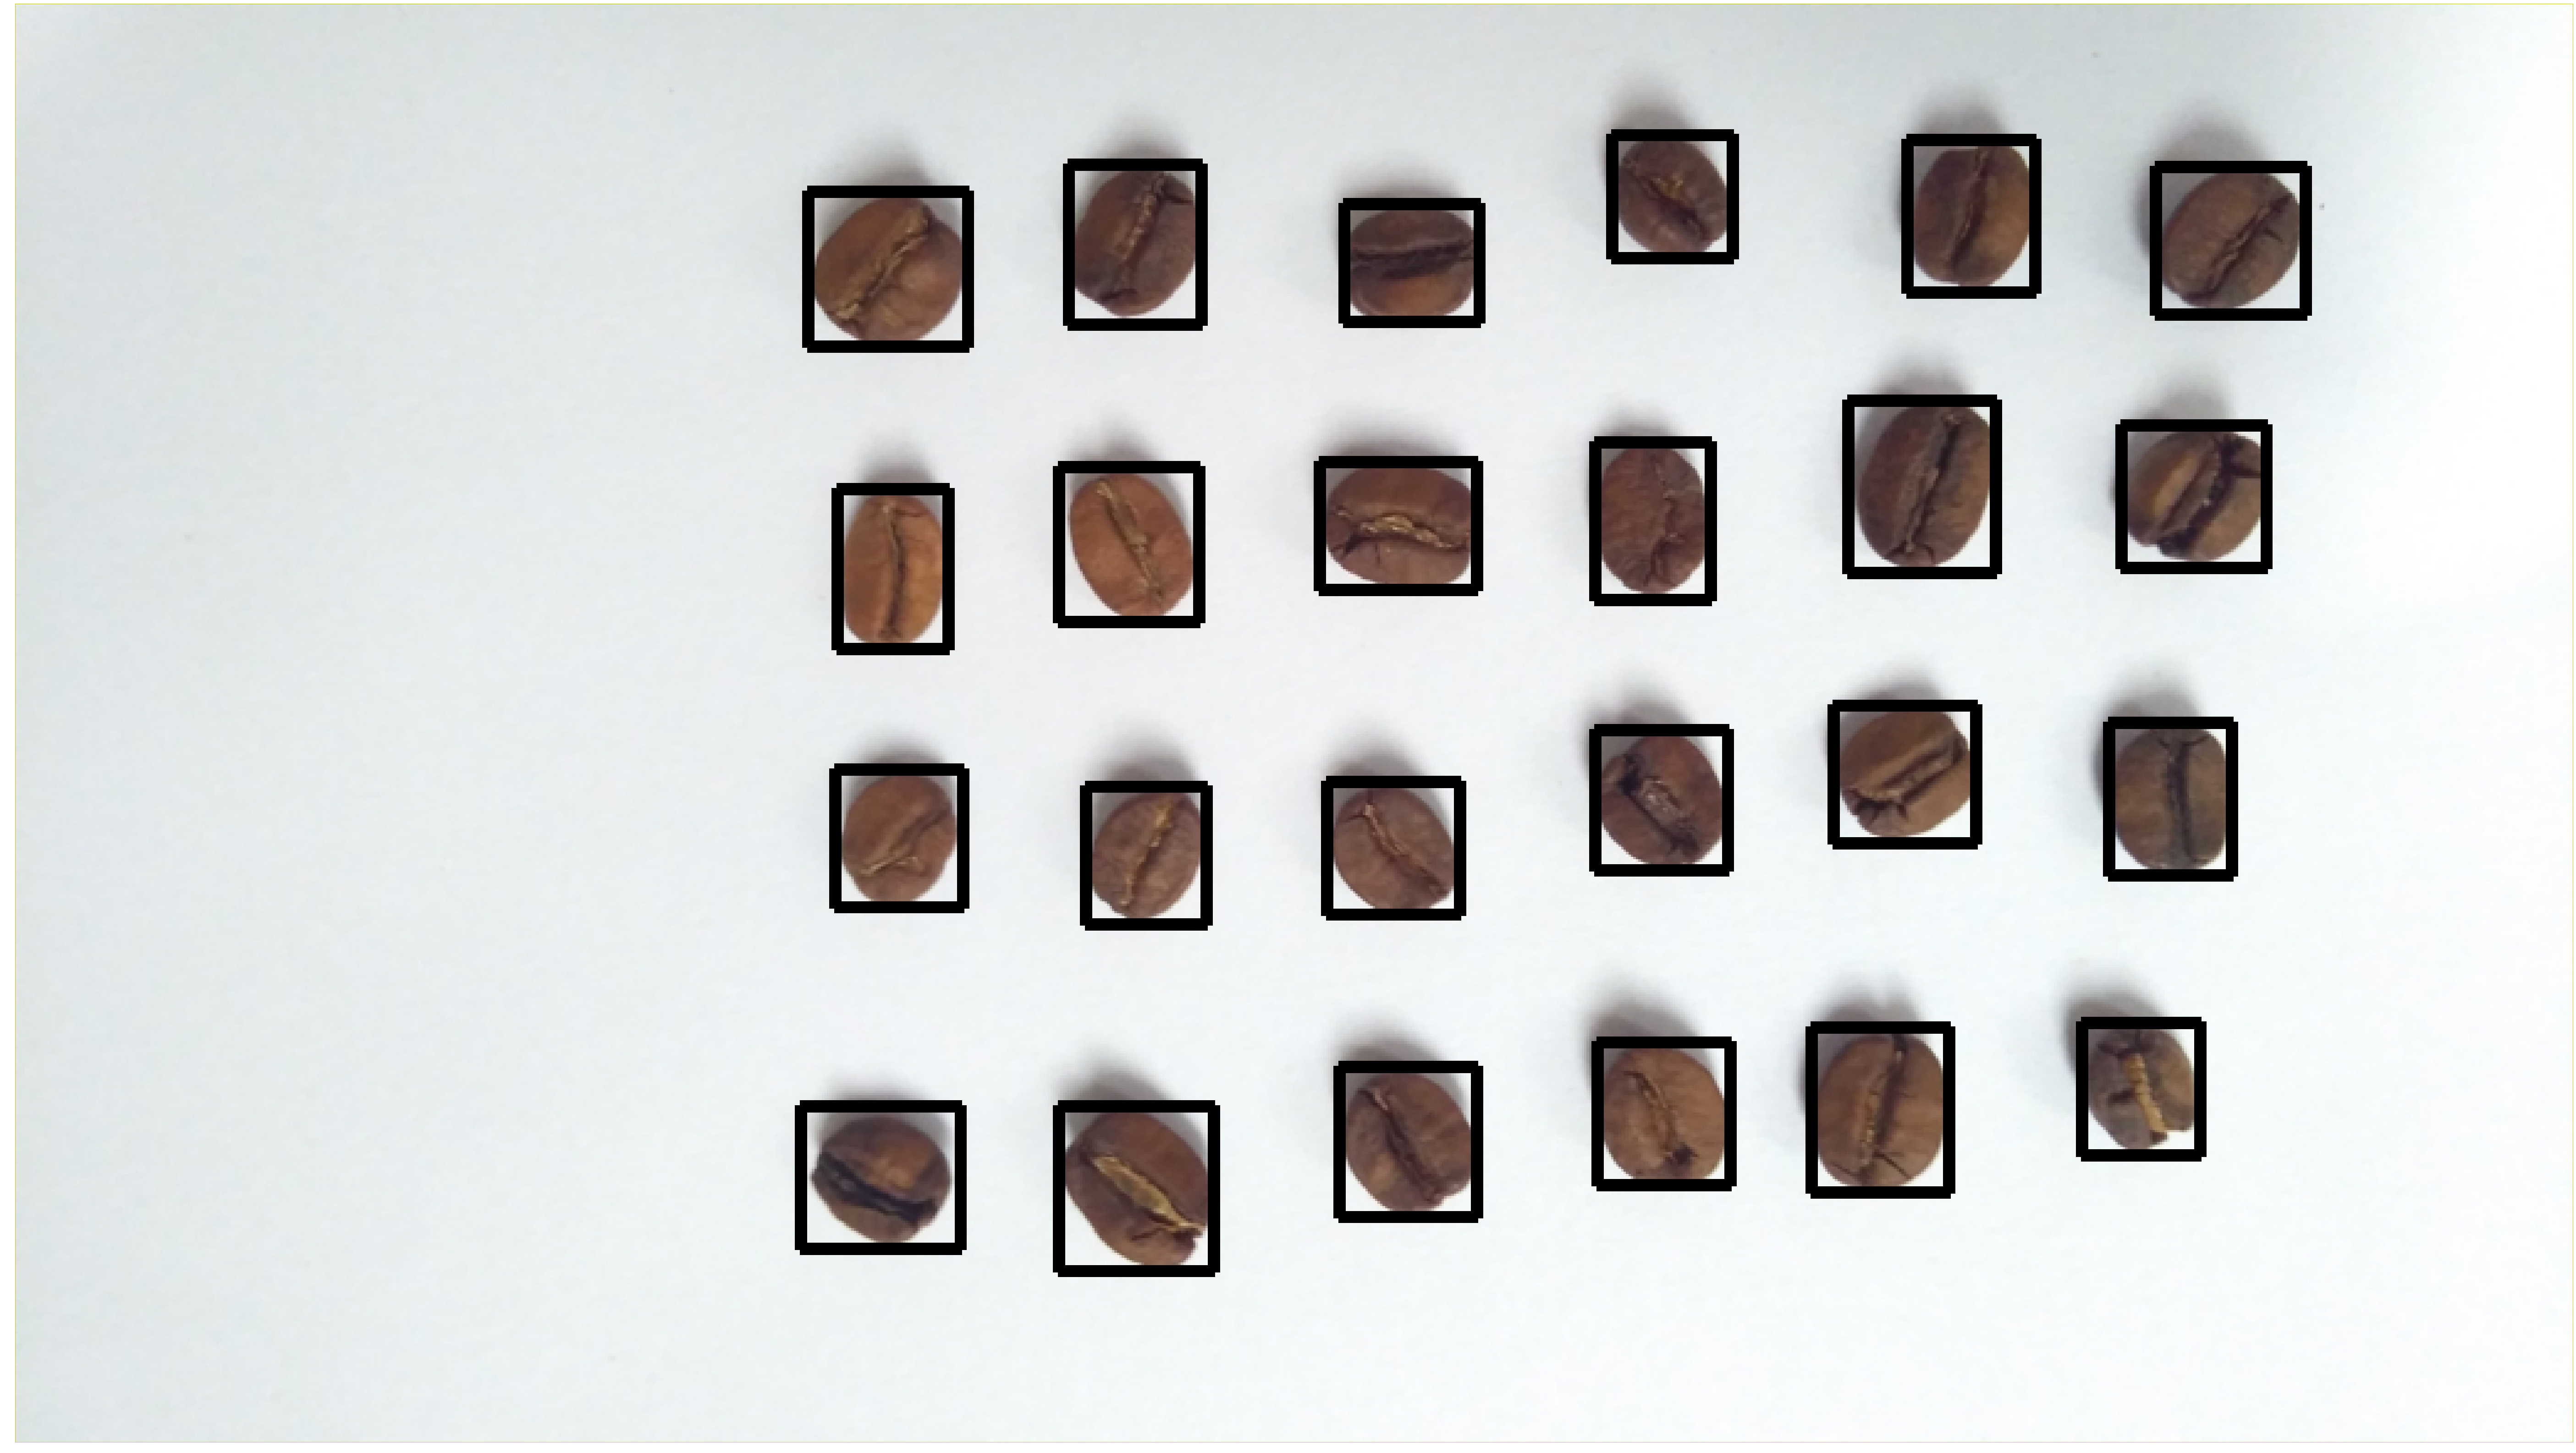

In [37]:

# getting a copy of the original image
image_to_print = np.array(original_image)

# prepare and display image with boxes
new_image = display_image_with_boxes(image_to_print, boxes, classes.numpy()[0])

plt.figure(figsize=(100, 100))
plt.imshow(new_image.astype("uint8"));


In [38]:
images_boxes = images_from_boxes(original_image, boxes)



In [39]:
predicted_ids = classify_coffee_beans(images_boxes)

# saving LABEL and BOXES to files
# np.savetxt(f'data/samples/LABEL_{FILE_NUMBER}.csv', predicted_ids, delimiter=",")
# np.savetxt(f'data/samples/BOX_{FILE_NUMBER}.csv', boxes, delimiter=",")

class_names = np.array(['bad', 'good'])
labels = class_names[predicted_ids]


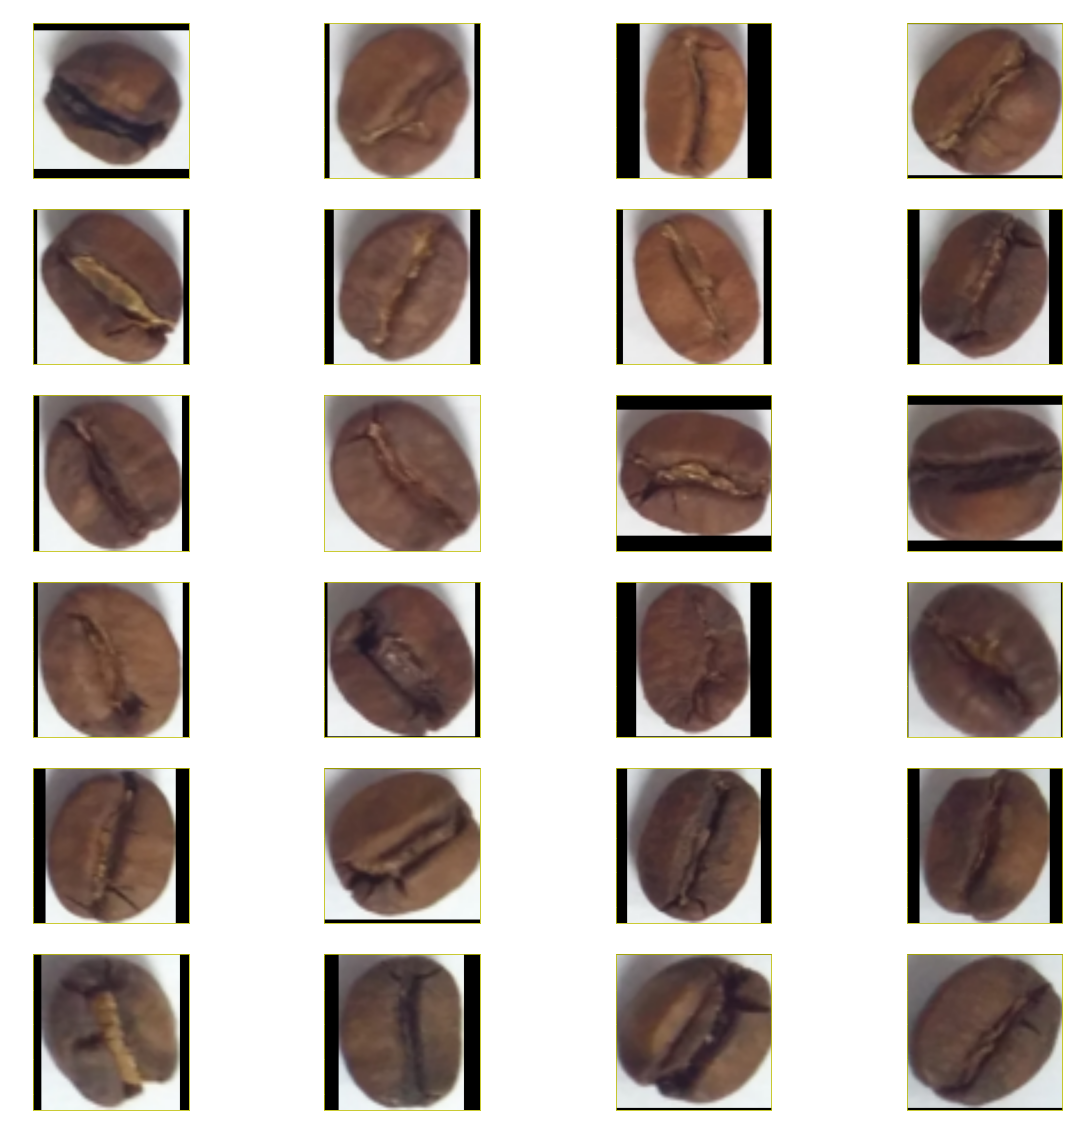

In [40]:
results = tf.data.Dataset.from_tensors((images_boxes, predicted_ids))
plt.figure(figsize=(20, 20))
for image, label in results:
  for i in range(len(labels)//4 * 4):
    ax = plt.subplot(len(labels)//4, 4, i + 1)
    plt.imshow(images_boxes[i].astype("uint8"))
    plt.title(f'{i} {class_names[label[i]]}')

